In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
pathToFile = '/mnt/home/jbielecki1/NEMA/'
fileName = 'NEMA_IQ_384str_N0_1000_COINCIDENCES_PREPARED_part00'

data = pickle.load(open(pathToFile + fileName, 'rb'))

In [3]:
def dataFrameNames():
    return [
        "x1",     # 1 gamma detected x position [cm]
        "y1",     # 1 gamma detected y position [cm]
        "z1",     # 1 gamma detected z position [cm]
        "t1",     # 1 gamma detection time [ps]
        "x2",     # 2 gamma detected x position [cm]
        "y2",     # 2 gamma detected y position [cm]
        "z2",     # 2 gamma detected z position [cm]
        "t2",     # 2 gamma detection time [ps]
        "vol1",   # 1 gamma volume ID
        "vol2",   # 2 gamma volume ID
        "e1",     # 1 gamma energy loss during detection [keV]
        "e2",     # 2 gamma energy loss during detection [keV]
        "class",  # Type of coincidence(1-true, 2-phantom-scattered, 3-detector-scattered, 4-accidental)
        "sX1",    # 1 gamma emission x position [cm]
        "sY1",    # 1 gamma emission y position [cm]
        "sZ1"     # 1 gamma emission z position [cm]
        "dt",     # Detection times difference
        "rX1",    # Reconstruction point - X cord
        "rY1",    # Reconstruction point - Y cord
        "rZ1",    # Reconstruction point - Z cord
        "rError", # Difference beetwen source point and recontructed point
        "volD",   # Volumes indexes difference
        "lorL",   # LOR length
        "deg3D",  # Angle beetwen lines (in XYZ geometry) connecting detection points with the center of detector
        "deg2D",  # Angle beetwen lines (in XY geometry) connecting detection points with the center of detector
        "rL",     # Distance beetween reconstructed point and the center of detector
        "eSum"    # Sum of the detecions energies
    ] 

In [4]:
dataClass1 = data[data['class'] == 1]
dataClass2 = data[data['class'] == 2]
dataClass3 = data[data['class'] == 3]
dataClass4 = data[data['class'] == 4]

In [24]:
def plotStats(subtitle, xlabel, attribute, rndm_log = False):
    plt.clf()
    fig = plt.gcf()
    plt.rc('font', size = 15)
    fig.set_size_inches(15.5, 4.5)
    fig.suptitle(subtitle, fontsize=16)
    ax1 = plt.subplot(1,3,1)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.hist(dataClass1[attribute], bins = 100, alpha = 0.5, color = 'green', label = 'TRUE')
    ax1.hist(dataClass2[attribute], bins = 100, alpha = 0.5, color = 'red', label = 'PH_SCAT')
    ax1.set_xlabel(xlabel, fontsize = 20)
    ax1.set_ylabel('Liczba koincydencji', fontsize = 20)
    ax1.tick_params(direction='out', labelsize = 15)
    ax1.legend()
    ax2 = plt.subplot(1,3,2)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax2.hist(dataClass1[attribute], bins = 100, alpha = 0.5, color = 'green', label = 'TRUE')
    ax2.hist(dataClass3[attribute], bins = 100, alpha = 0.5, color = 'red', label = 'DET_SCAT')
    ax2.set_xlabel(xlabel, fontsize = 20)
    ax2.legend()
    ax2.tick_params(direction='out', labelsize = 15)
    ax3 = plt.subplot(1,3,3)
    ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax3.hist(dataClass1[attribute], bins = 100, alpha = 0.5, color = 'green', label = 'TRUE')
    ax3.hist(dataClass4[attribute], bins = 100, alpha = 0.5, color = 'red', label = 'RNDM')
    ax3.set_xlabel(xlabel, fontsize = 20)
    ax3.legend()
    ax3.tick_params(direction='out', labelsize = 15)
    if rndm_log:
        ax3.set_yscale('log')
        ax3.set_xscale('log')
    plt.show()

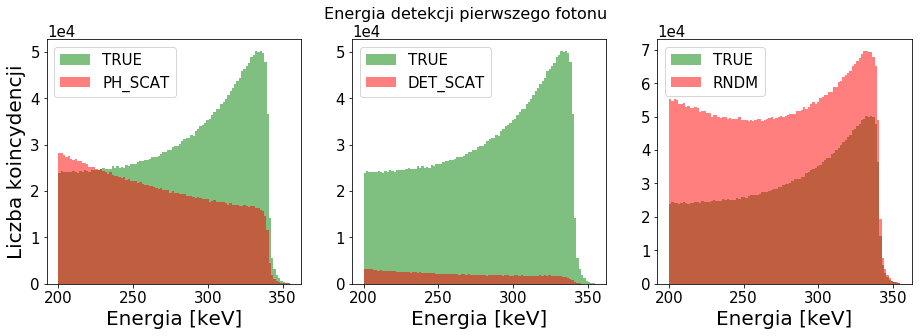

In [17]:
plotStats(
    subtitle = 'Energia detekcji pierwszego fotonu', 
    xlabel = 'Energia [keV]', 
    attribute = 'e1'
)

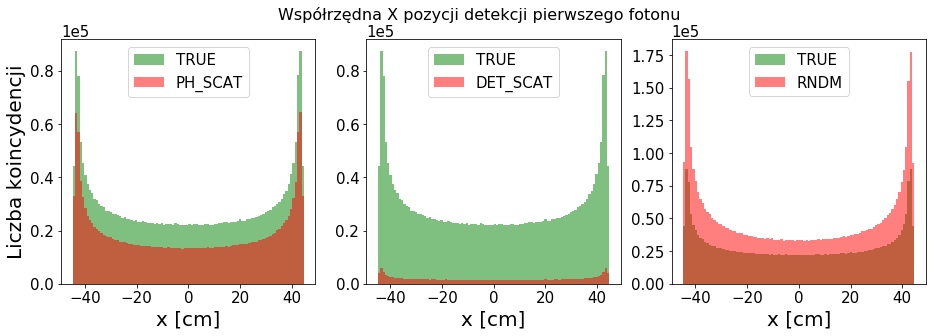

In [18]:
plotStats(
    subtitle = 'Współrzędna X pozycji detekcji pierwszego fotonu', 
    xlabel = 'x [cm]', 
    attribute = 'x1'
)

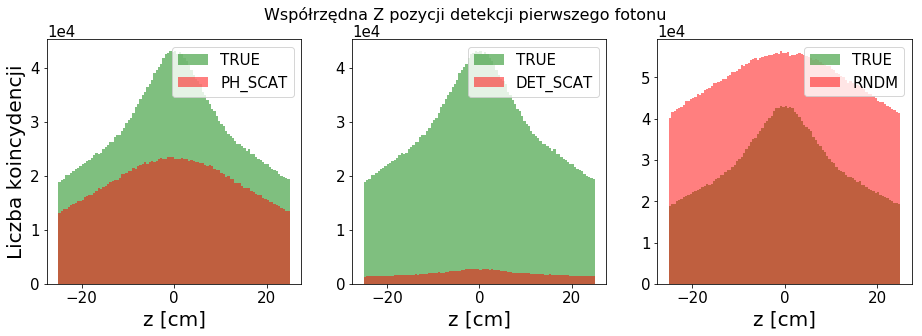

In [19]:
plotStats(
    subtitle = 'Współrzędna Z pozycji detekcji pierwszego fotonu', 
    xlabel = 'z [cm]', 
    attribute = 'z1'
)

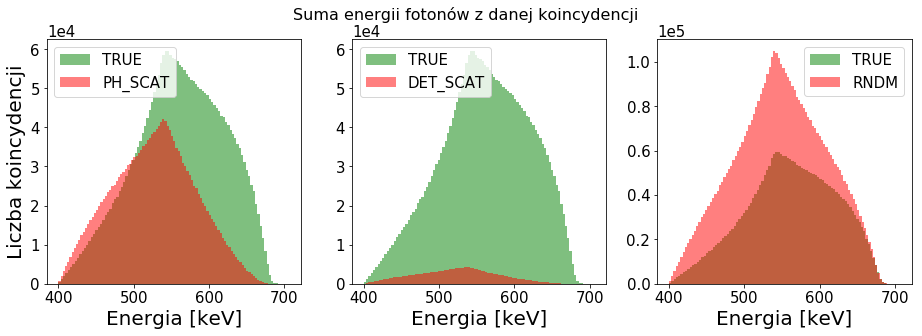

In [20]:
plotStats(
    subtitle = 'Suma energii fotonów z danej koincydencji', 
    xlabel = 'Energia [keV]', 
    attribute = 'eSum'
)

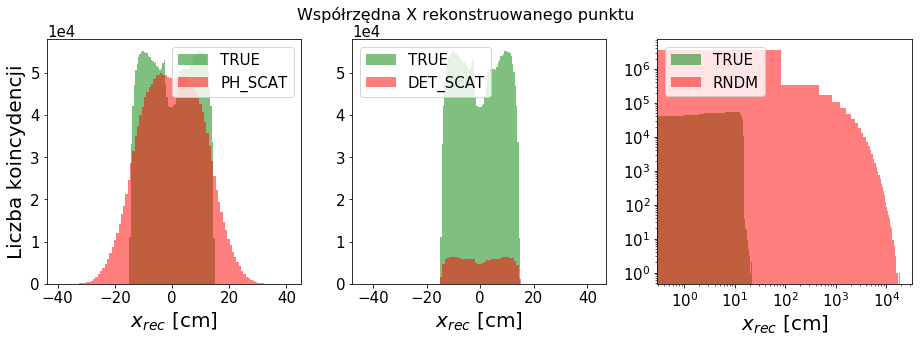

In [26]:
plotStats(
    subtitle = 'Współrzędna X rekonstruowanego punktu', 
    xlabel = '$x_{rec}$ [cm]', 
    attribute = 'rX1',
    rndm_log = True
)

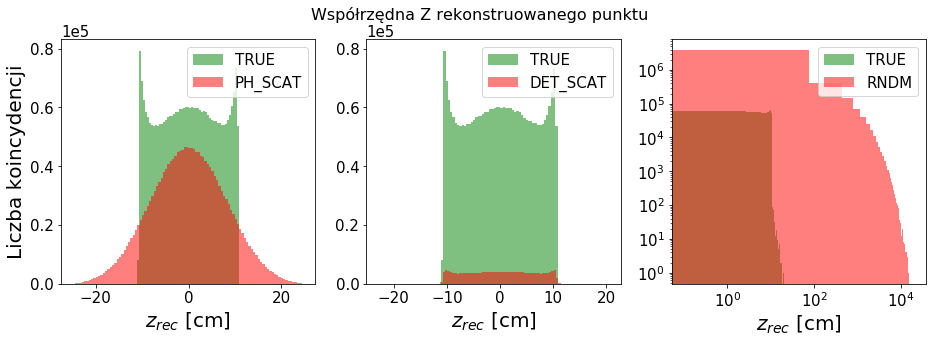

In [25]:
plotStats(
    subtitle = 'Współrzędna Z rekonstruowanego punktu', 
    xlabel = '$z_{rec}$ [cm]', 
    attribute = 'rZ1',
    rndm_log = True
)

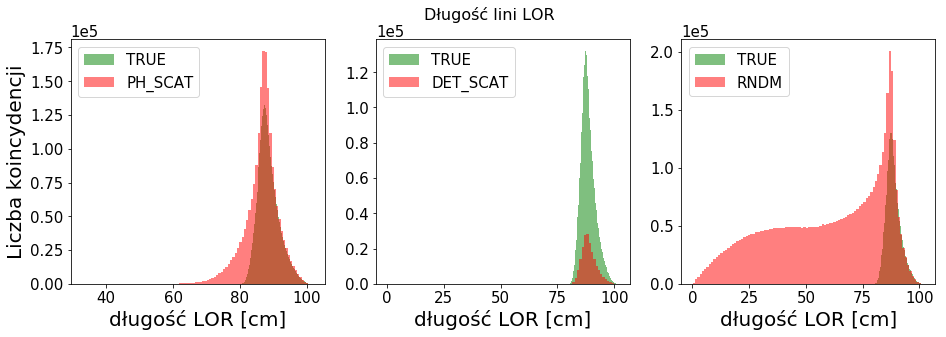

In [27]:
plotStats(
    subtitle = 'Długość lini LOR', 
    xlabel = 'długość LOR [cm]', 
    attribute = 'lorL'
)

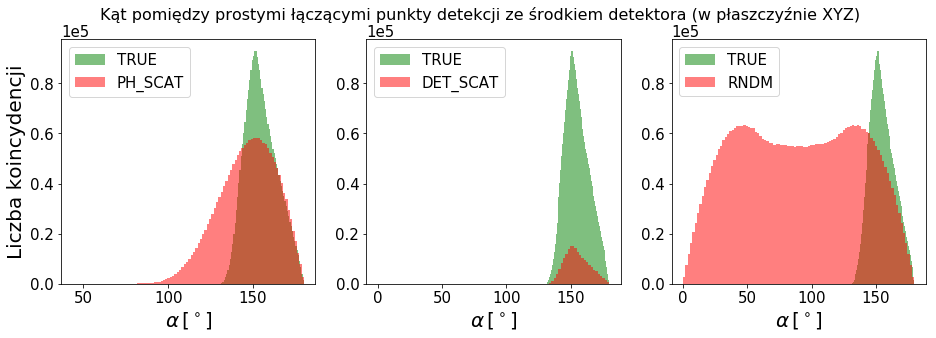

In [28]:
plotStats(
    subtitle = 'Kąt pomiędzy prostymi łączącymi punkty detekcji ze środkiem detektora (w płaszczyźnie XYZ)', 
    xlabel = r'$\alpha\,[^\circ]$', 
    attribute = 'deg3D'
)

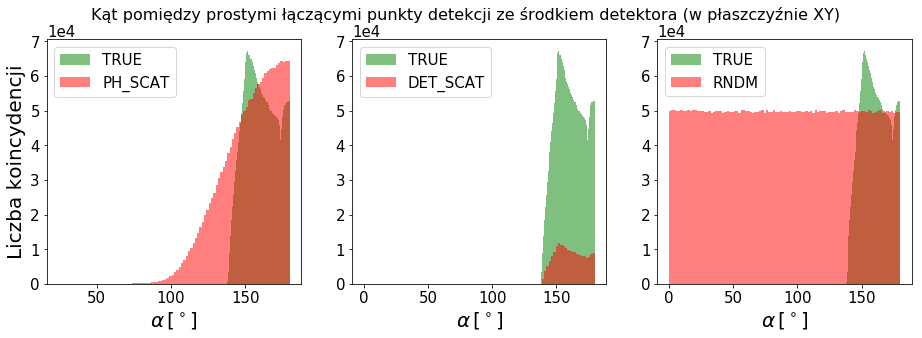

In [29]:
plotStats(
    subtitle = 'Kąt pomiędzy prostymi łączącymi punkty detekcji ze środkiem detektora (w płaszczyźnie XY)', 
    xlabel = r'$\alpha\,[^\circ]$', 
    attribute = 'deg2D'
)

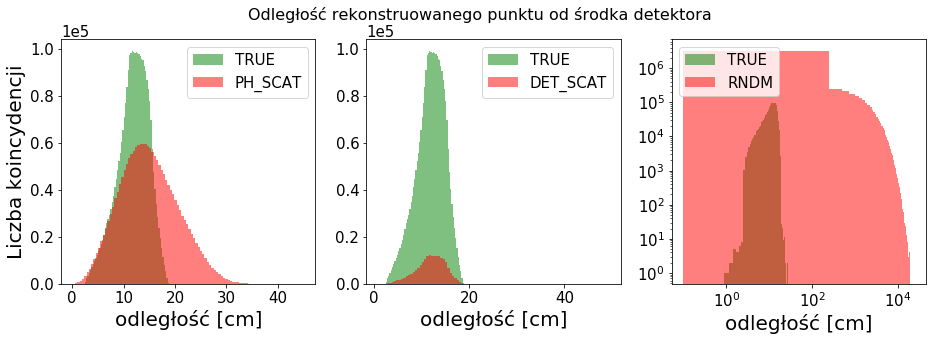

In [32]:
plotStats(
    subtitle = 'Odległość rekonstruowanego punktu od środka detektora', 
    xlabel = 'odległość [cm]', 
    attribute = 'rL',
    rndm_log = True
)

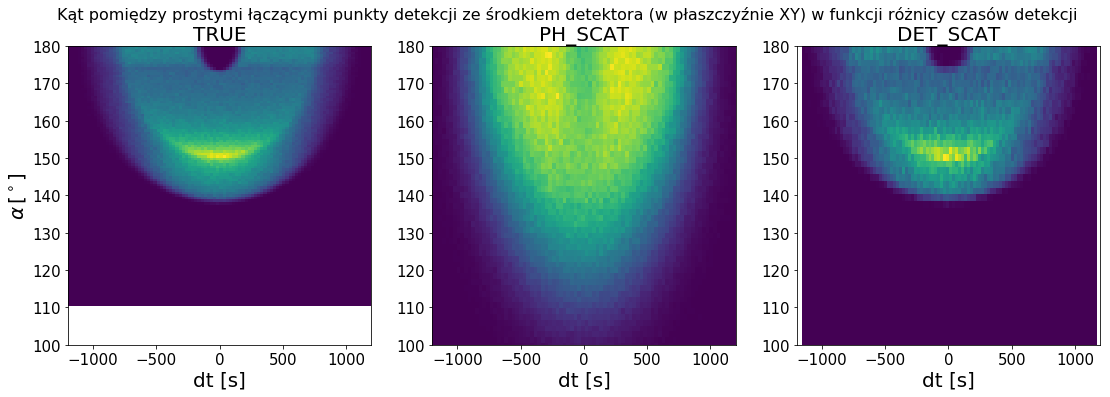

In [36]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle('Kąt pomiędzy prostymi łączącymi punkty detekcji ze środkiem detektora (w płaszczyźnie XY) \
w funkcji różnicy czasów detekcji', fontsize=16)
ax1 = plt.subplot(1,3,1)
ax1.hist2d(y = dataClass1['deg2D'], x = dataClass1['dt'], bins = 100)
ax1.set_ylim([100, 180])
ax1.set_xlim([-1200, 1200])
ax1.set_xlabel('dt [s]', fontsize = 20)
ax1.tick_params(direction='out', labelsize = 15)
ax1.set_title('TRUE', fontsize = 20)
ax1.set_ylabel(r'$\alpha\,[^\circ]$', fontsize = 20)
ax1.set_xlabel('dt [s]', fontsize = 20)
ax2 = plt.subplot(1,3,2)
ax2.hist2d(y = dataClass2['deg2D'], x = dataClass2['dt'], bins = 100)
ax2.set_ylim([100, 180])
ax2.set_xlim([-1200, 1200])
ax2.set_xlabel('dt [s]', fontsize = 20)
ax2.tick_params(direction='out', labelsize = 15)
ax2.set_title('PH_SCAT', fontsize = 20)
ax2.set_xlabel('dt [s]', fontsize = 20)
ax3 = plt.subplot(1,3,3)
ax3.hist2d(y = dataClass3['deg2D'], x = dataClass3['dt'], bins = 100)
ax3.set_ylim([100, 180])
ax3.set_xlim([-1200, 1200])
ax3.set_xlabel('dt [s]', fontsize = 20)
ax3.tick_params(direction='out', labelsize = 15)
ax3.set_title('DET_SCAT', fontsize = 20)
ax3.set_xlabel('dt [s]', fontsize = 20)
plt.show()

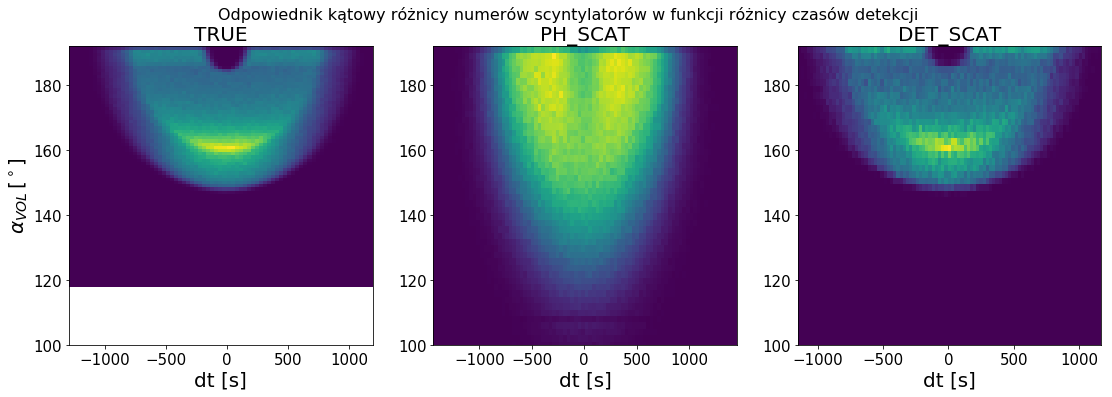

In [35]:
plt.clf()
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle('Odpowiednik kątowy różnicy numerów scyntylatorów w funkcji różnicy czasów detekcji', fontsize=16)
ax1 = plt.subplot(1,3,1)
ax1.hist2d(y = dataClass1['volD'], x = dataClass1['dt'], bins = 75)
ax1.set_ylim([100, 192])
ax1.set_title('TRUE', fontsize = 20)
ax1.set_ylabel(r'$\alpha_{VOL}\,[^\circ]$', fontsize = 20)
ax1.set_xlabel('dt [s]', fontsize = 20)
ax2 = plt.subplot(1,3,2)
ax2.hist2d(y = dataClass2['volD'], x = dataClass2['dt'], bins = 84)
ax2.set_ylim([100, 192])
ax2.set_title('PH_SCAT', fontsize = 20)
ax2.set_xlabel('dt [s]', fontsize = 20)
ax3 = plt.subplot(1,3,3)
ax3.hist2d(y = dataClass3['volD'], x = dataClass3['dt'], bins = 95)
ax3.set_ylim([100, 192])
ax3.set_title('DET_SCAT', fontsize = 20)
ax3.set_xlabel('dt [s]', fontsize = 20)
plt.show()